In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc

%matplotlib inline

## Problem 3

In [9]:
#create pandas dataframe from one .txt file
def getData(year):
    #read the .txt file into a dataframe to work with
    return pd.read_csv("./Names/yob%s.txt" % year ,names = ["Name", "Gender", "Number"])

#find the k largest names by year
def top_k_by_year(k, year):
    data = getData(year)
    return data.nlargest(k, 'Number')['Name']

#find the number of occurences of a particular name in a certain year for both males and females
def name_frequency(name, year):
    data = getData(year)
    
    #find all the people in a particular year with the same name and each gender
    male_result = data['Number'].loc[(data['Name'] == name) & (data['Gender'] == 'M')]
    female_result = data['Number'].loc[(data['Name'] == name) & (data['Gender'] == 'F')]
    
    male_count = male_result.values[0] if not male_result.empty else 0
    female_count = female_result.values[0] if not female_result.empty else 0
    return male_count, female_count

#find the occurences of a name in our dataset:
def name_frequency_all_years(name):
    male_count_total = 0
    female_count_total = 0
    for year in range(1880,2016):
        male_count, female_count = name_frequency(name, year)
        male_count_total += male_count
        female_count_total += female_count
    
    return male_count_total, female_count_total

#find the frequency of a name, relative to the total number of different names that year
def relative_frequency(name, year):
    data = getData(year)
    male_name_count, female_name_count = name_frequency(name, year)
    
    #sum up the number of names in a year, and then return the relative frequencies per gender
    total = float(np.sum(data,axis=0)[2])
    return male_name_count / total, female_name_count / total
    
#find the frequency of a name over the course of all the records
def get_every_year_frequency(name, relative=False):
    data = []
    for year in range(1880, 2016):
        #get data
        df = getData(year)
        df['Year'] = year
        if not relative:
            #if not relative, add new Frequency column with absolute frequency values
            male_freq, female_freq = name_frequency(name, year)
            df.loc[(df['Name'] == name) & (df['Year'] == year) & (df['Gender'] == 'M'), 'Frequency'] = male_freq
            df.loc[(df['Name'] == name) & (df['Year'] == year) & (df['Gender'] == 'F'), 'Frequency'] = female_freq
        else:
            #if not relative, add new Frequency column with relative frequency values
            male_freq, female_freq = relative_frequency(name, year)
            df.loc[(df['Name'] == name) & (df['Year'] == year) & (df['Gender'] == 'M'), 'Frequency'] = male_freq
            df.loc[(df['Name'] == name) & (df['Year'] == year) & (df['Gender'] == 'F'), 'Frequency'] = female_freq
        #add yearly data to collection of data using only the year, name, frequency, and gender columns
        data.append(df.loc[(df['Name'] == name) & (df['Year'] == year), ('Year', 'Name', 'Frequency', 'Gender')])
    #create one dataframe from the array of smaller dataframes
    data = pd.concat(data)
    return data

#plot the frequency of a name over time
def plot_frequency_data(data, name='', relative=False):
    sns.set_style('whitegrid')
    f = plt.figure(figsize=(18, 8))
        
    sns.pointplot(data=data, x='Year', y='Frequency', hue='Gender')
    sns.despine()
    f.tight_layout()

    plt.title('Frequency of %s throughout US population' % (name))
    if not relative:
        plt.ylabel('Absolute Frequency')
    else:
        plt.ylabel('Relative Frequency (% of population)')

    plt.xlabel('Year')
    plt.xticks(rotation=90)
    plt.show()
    
#find which names started off being more popular for one gender and later switched to another gender
def find_more_popular():
    data = []
    for year in range(1880,2016):
        df = getData(year)
        df['Year'] = year
        data.append(df)
        
    data = pd.concat(data)
    
    #create new diff column with number of names positive for males and negative for females
    data["diff"] = data["Gender"].map({'M':1,'F':-1})
    data["diff"] = data["diff"] * data["Number"]
    
    #group data by name and year, sum up the columns, and drop the year column
    data = data.groupby(["Name","Year"]).sum()
    data = data.reset_index().drop('Year',1)
    
    #for each name, create new columns with the minimum value (i.e. females) and maximum value (i.e. males) 
    data = data.groupby('Name').agg({'diff':['min','max']})
    data.columns = ['min', 'max']
    
    #create new switch column which identifies if a name switched from positive to negative or vice verse
    data['switch'] = (np.sign(data["min"] * data['max']) == -1)
    
    #Remove data that didn't switch gender
    data = data[data['switch']].reset_index()
    
    return data['Name'].values

In [10]:
data2015=getData(2015)

In [11]:
data2015.head()

,Name,Gender,Number
0,Emma,F,20355
1,Olivia,F,19553
2,Sophia,F,17327
3,Ava,F,16286
4,Isabella,F,15504


In [12]:
name_frequency("Emma",2004) #male frequency, female frequency for the year

(102, 21602)

In [13]:
name_frequency_all_years("Joel") #male, female

(260162, 2533)

In [14]:
relative_frequency("John",2011)

(0.0030221838766065373, 5.755496636323323e-06)

In [15]:
print(top_k_by_year(5,2000).to_string(index=False))

  Jacob
Michael
Matthew
 Joshua
  Emily


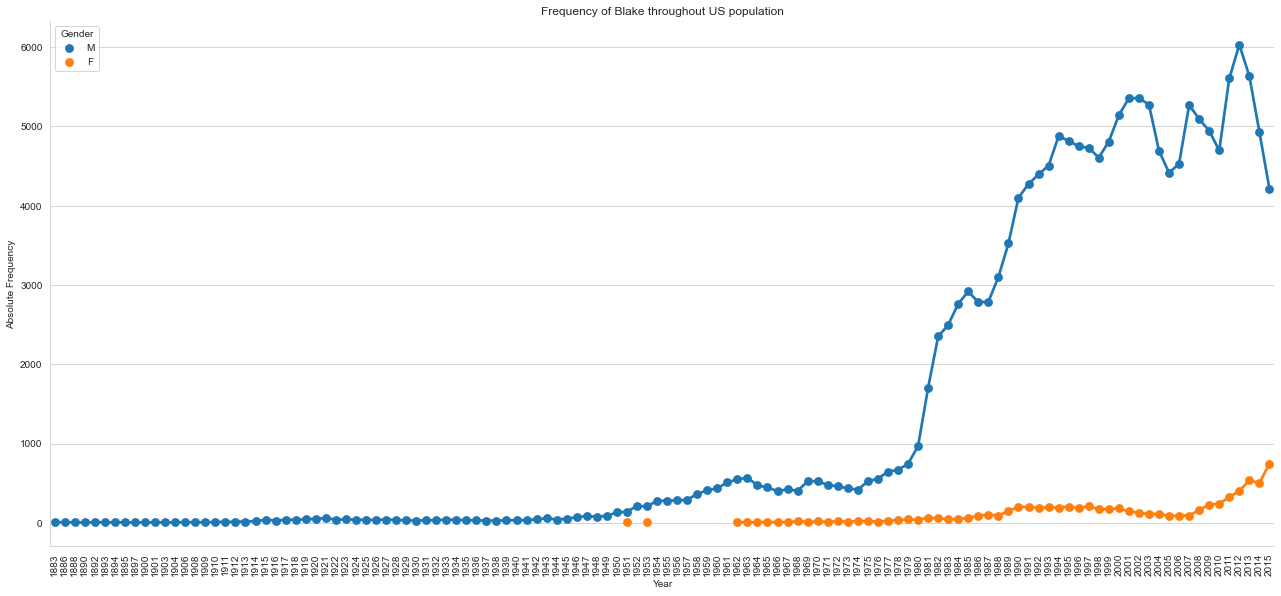

In [24]:
data = get_every_year_frequency('Blake')
plot_frequency_data(data, name='Blake')

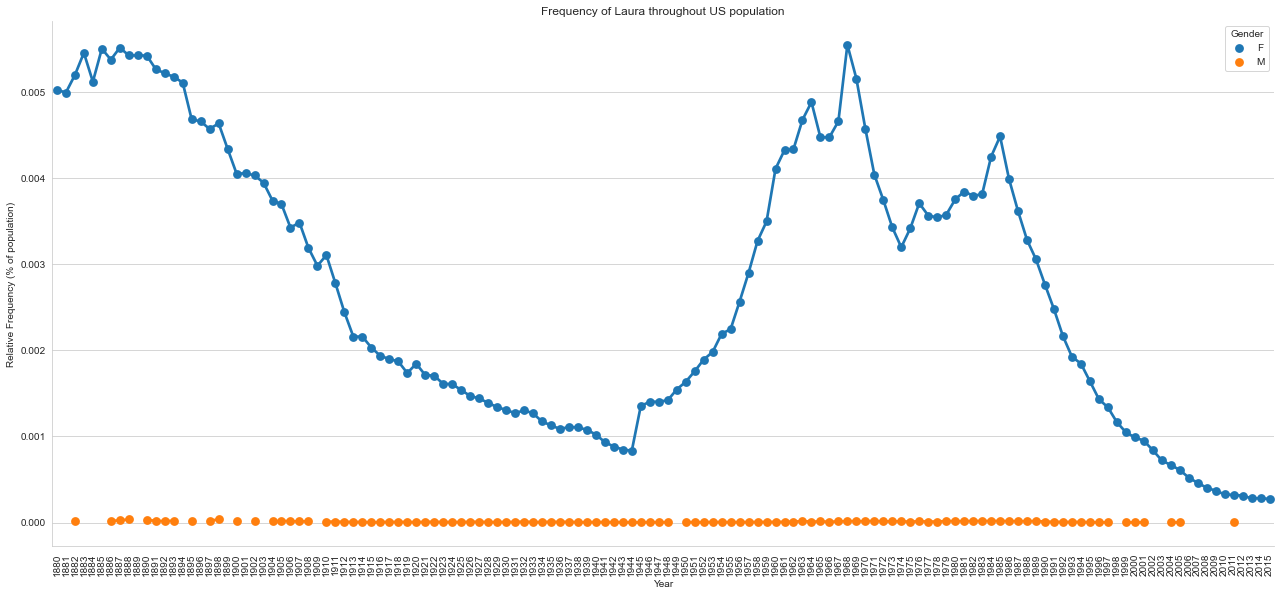

In [26]:
data = get_every_year_frequency('Laura', relative=True)
plot_frequency_data(data, name='Laura', relative=True)

/var/folders/3p/vdwzhsn56ldby9nw4xw9sp440000gn/T/ipykernel_85788/829892602.py:101: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.reset_index().drop('Year',1)


['Aalijah' 'Aamari' 'Aaren' 'Aareon' 'Aari' 'Aarian' 'Aarin' 'Aaris'
 'Aarya' 'Aaryn' 'Aavyn' 'Aba' 'Abba' 'Abbey' 'Abell' 'Abey' 'Abie'
 'Abijah' 'Abimbola' 'Abiola' 'Abir' 'Abishai' 'Abiyah' 'Abney' 'Abrar'
 'Abraxas' 'Abrian' 'Abriel' 'Aby' 'Abyan' 'Acelin' 'Acey' 'Acy' 'Adair'
 'Adali' 'Adama' 'Adar' 'Adason' 'Addington' 'Addis' 'Addison' 'Adean'
 'Adebola' 'Adel' 'Adell' 'Adeyinka' 'Adgie' 'Adi' 'Adie' 'Adis' 'Adisa'
 'Adison' 'Adley' 'Admire' 'Adna' 'Adonai' 'Adoniah' 'Adraine' 'Adrean'
 'Adriann' 'Adrien' 'Adrienn' 'Adrin' 'Adrine' 'Adryan' 'Adryn' 'Adyn'
 'Aeon' 'Aerion' 'Aeron' 'Afsheen' 'Afton' 'Agam' 'Agape' 'Ah' 'Ahmari'
 'Aideen' 'Aidyn' 'Aidynn' 'Aijalon' 'Aiman' 'Aimar' 'Aime' 'Aimen'
 'Ainsley' 'Airen' 'Aireon' 'Aires' 'Airin' 'Airon' 'Aivan' 'Ajae' 'Ajai'
 'Ajalon' 'Ajene' 'Akai' 'Aki' 'Akida' 'Akie' 'Akili']


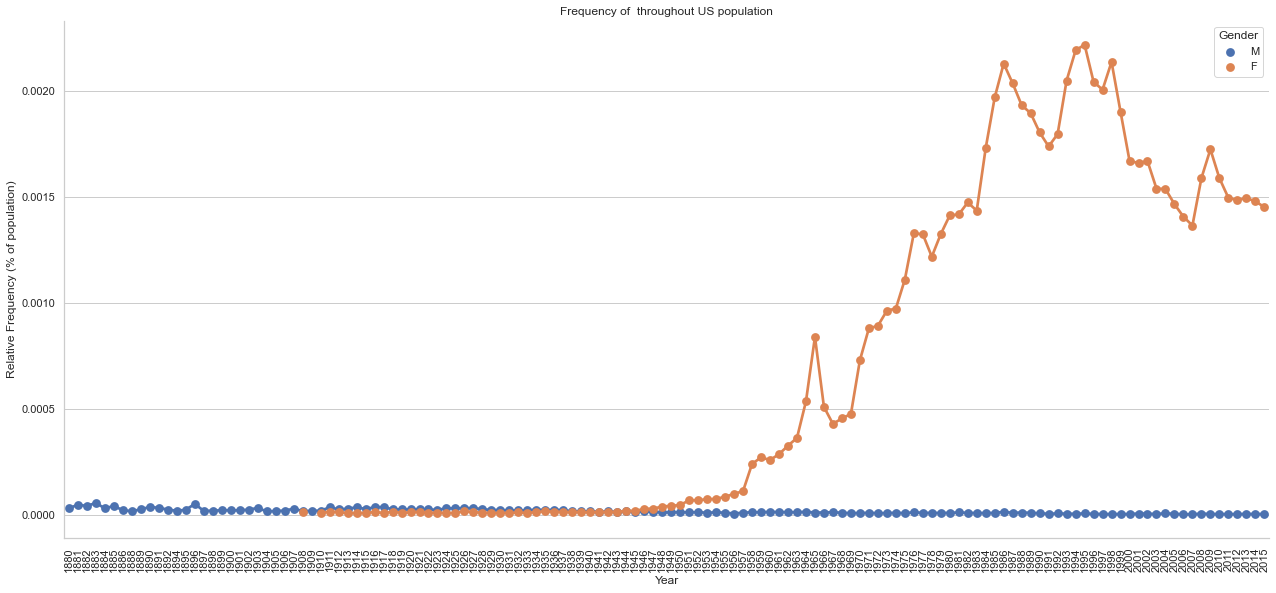

In [41]:
print(find_more_popular()[0:100]) #print first 100 names

data = get_every_year_frequency('Allison', relative=True)
plot_frequency_data(data, relative=True)

## Problem 5

**Visualization Tools and Missing/Hidden Values.**

Visualization is important both forexploring the data, as well as for explaining what you have done.  There are a huge number of such tools now available.  This exercise walks through various functionalities of matplotlib and pandas.

•The first part of this exercise was created by Dataquest.  Run through the commands given in this tutorial:  https://www.dataquest.io/blog/matplotlib-tutorial/ and under-stand the code.

•Suppose that you would now like to plot some of the results by state.  As you will see,the state information is sometimes missing, and other times it comes in varying forms. Figure out how to aggregate the results by state.  The challenge here:  how many of thetweets can you (correctly) assign to a state?  Note: depending on how well you want todo (i.e., how many tweets you want to correctly assign to their state), this is not an easy problem!

**Answer**


Follow through the excercise step by step for the first part.

For the second part you can do this in many different ways. The simplest way is too just hardcode it and look for every possible spelling of each state (e.g. TX, Texas, texas, austin, Austin, Dallas, houston, etc.). Of course doing this for the most populus states first, and then just hardcoding (or even ignoring) the state names for smaller states will get you the most results for your effort.

There are of course much more advanced ways of predicting the state. This could include just using the user location (as done above), but also using the actual tweet content and other variables. A classification model can be created to predict which of the 50 states the user most likely belongs. You could even create an advanced deep learning model to read through the text and user location word by word.

Of course building a simple parser that looks through several of the most popular states is plenty for the purposes of this question.

## Problem 6

**More Visualization Tools – Optional.**

This exercise was also created by Dataquest.  Run through the exercise https://www.dataquest.io/blog/python-data-visualization-libraries/for more visualization tools, including some that allow you to plot points on a map, and also to create interactive maps (zoom in, etc.).

**Answer**

Follow through the excercise step by step.

## Written Questions


## Problem 1

## Problem 2